In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.preprocessing
import sklearn.datasets

wine = sklearn.datasets.load_wine()

# Access the numerical data from the wine Bunch
data = wine['data']

# Load data about the rows and columns
feature_names = wine['feature_names']

# Load cultivar information about each wine
cultivars = np.array(['Cultivar{}'.format(cl) for cl in wine['target']])

# Create nice names for each row
wine_names = np.array(['Wine{}'.format(i) for i in range(data.shape[0])])

# use the sklearn StandardScaler to scale to mean 0, variance 1
data = sklearn.preprocessing.StandardScaler().fit_transform(data)

# Gather all of this information into a DataFrame
data = pd.DataFrame(data, columns=feature_names, index=wine_names)

# Print the first 5 rows of the data, eq. to data[:5]
data.head()






,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
Wine0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
Wine1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
Wine2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
Wine3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
Wine4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


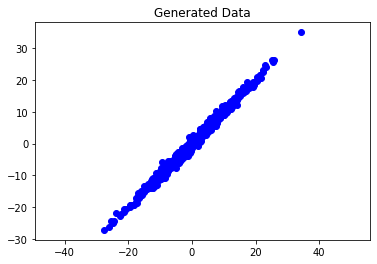

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#plt.rcParams['figure.figsize'] = (12, 8)

# Normal distributed x and y vector with mean 0 and standard deviation 1
x = np.random.normal(0, 10, 500)
y = np.random.normal(0, 1, 500)+x
X = np.vstack((x, y)).T

plt.scatter(X[:, 0], X[:, 1], color ='blue')
plt.title('Generated Data')
plt.axis('equal');

In [12]:
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

# Covariance matrix
def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])

# Calculate covariance matrix 
cov_mat(X.T) # (or with np.cov(X.T))

array([[98.53581985, 98.44167307],
       [98.44167307, 99.28614786]])

In [13]:
correlated_vars = data[["total_phenols","flavanoids"]] #picking correlated variables 
cov_matrix = correlated_vars.cov() #computing covariance matrix
eigvals,eigvect = np.linalg.eig(cov_matrix) #Finding the eigenvalues and eigenvectors
L = np.diag(np.sqrt(eigvals)) #The sqrt of eigenvalues
C = eigvect @ L #The matrix C for applying to the data
x = np.random.normal(0,1,1000) #generating normal variables
y = np.random.normal(0,1,1000)
X = np.vstack((x,y))
X_prime = C @ X #creating the correlated data
np.cov(X_prime)

array([[1.02034411, 0.86915784],
       [0.86915784, 0.97991365]])

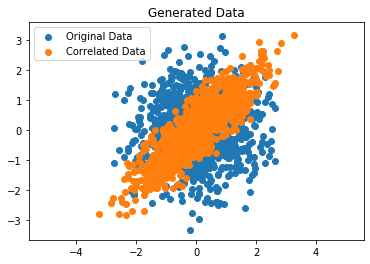

In [14]:
plt.scatter(X[0], X[1], label="Original Data")
plt.scatter(X_prime[0], X_prime[1], label = "Correlated Data")
plt.legend(loc="best")
plt.title('Generated Data')
plt.axis('equal');

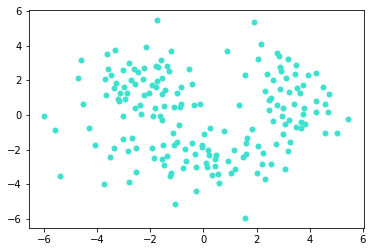

In [23]:
from scipy.spatial.distance import pdist, squareform
from sklearn import manifold 

d = pdist(data)

similarities = squareform(d)

mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, 
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(similarities).embedding_

nmds = manifold.MDS(n_components=2, metric=False, max_iter=3000, eps=1e-12,
                    dissimilarity="precomputed", n_jobs=1,
                    n_init=1)
npos = nmds.fit_transform(similarities, init=pos)

plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', lw=0, label='MDS')

(15753,)
(178, 178)


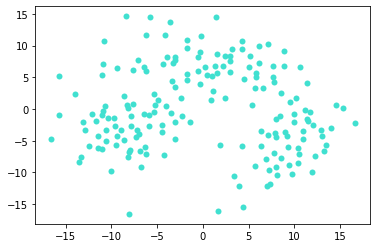

In [21]:
from scipy.spatial.distance import pdist, squareform
from sklearn import manifold 

d = pdist(data,'cityblock')

similarities = squareform(d)

print(d.shape)
print(similarities.shape)

mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, 
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(similarities).embedding_

nmds = manifold.MDS(n_components=2, metric=False, max_iter=3000, eps=1e-12,
                    dissimilarity="precomputed", n_jobs=1,
                    n_init=1)
npos = nmds.fit_transform(similarities, init=pos)

plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', lw=0, label='MDS')